# ST494 Final Project - Wine Classification

Myisha Chaudhry- 200591740

Kayleigh Habib - 200370580

Abigail Lee - 200469770


### Introduction

In [1]:
if(!require("corrplot")){install.packages("corrplot")}
if(!require("kernlab")){install.packages("kernlab")}
if(! require("tidyverse")){install.packages("tidyverse")}
if(!require("factoextra")) {install.packages('factoextra')}
library(dplyr)
library(ggplot2)
library(corrplot)
library(GGally)
library(caret) 
library(class)
library(randomForest)
library(tree)
library(kernlab)      
library(e1071)  
library(pROC)
library(tidyverse)
library(factoextra)

Loading required package: corrplot

corrplot 0.92 loaded

Loading required package: kernlab

Loading required package: tidyverse

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::alpha() masks kernlab::alpha()
✖ purrr::cross()   masks kernlab::cross()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()

Loading required package: factoextra

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: lattice


Attaching package: ‘caret’


The following object is 

### Load and Describe Data

The data used was retrieved from the University of California, Irvine (UCI) Machine Learning repository (https://archive.ics.uci.edu/ml/datasets/wine+quality) and represents data that related to red and white wines from northern Portugal.

In [2]:
# Load the data
red <- read.csv("winequality-red.csv", sep = ";")
white <- read.csv("winequality-white.csv", sep = ";")

In [3]:
red$type <- as.factor("red")
#head(red)
white$type<- as.factor("white")
#head(white)

In [4]:
#both data sets contain the same columns in the same order
#so we could bind them together
data <- rbind(red, white)%>% 
  select(quality, everything()) #set quality in first column
data

quality,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,type
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5,7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,red
5,7.8,0.880,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,red
5,7.8,0.760,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,red
6,11.2,0.280,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,red
5,7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,red
5,7.4,0.660,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,red
5,7.9,0.600,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,red
7,7.3,0.650,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,red
7,7.8,0.580,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,red


In [5]:
# Look at the makeup of the data
str(data)
#6497 rows of 13 variables and 1 target (quality)

'data.frame':	6497 obs. of  13 variables:
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ type                : Factor w/ 2 levels "red","white": 1 1 1 1 1 1 1 1 1 1 ...


In [6]:
# get current column names
colnames(data)
#rename columns
names(data) <- c('quality','fixAcid','volAcid','citAcid','resSugar','chlor','freeSO2','totSO2','density','pH','sulphate','alcohol','type')
#check new column names and for any missing values
summary(data)
#No NA

[1] "quality"              "fixed.acidity"        "volatile.acidity"    
 [4] "citric.acid"          "residual.sugar"       "chlorides"           
 [7] "free.sulfur.dioxide"  "total.sulfur.dioxide" "density"             
[10] "pH"                   "sulphates"            "alcohol"             
[13] "type"

    quality         fixAcid          volAcid          citAcid      
 Min.   :3.000   Min.   : 3.800   Min.   :0.0800   Min.   :0.0000  
 1st Qu.:5.000   1st Qu.: 6.400   1st Qu.:0.2300   1st Qu.:0.2500  
 Median :6.000   Median : 7.000   Median :0.2900   Median :0.3100  
 Mean   :5.818   Mean   : 7.215   Mean   :0.3397   Mean   :0.3186  
 3rd Qu.:6.000   3rd Qu.: 7.700   3rd Qu.:0.4000   3rd Qu.:0.3900  
 Max.   :9.000   Max.   :15.900   Max.   :1.5800   Max.   :1.6600  
    resSugar          chlor            freeSO2           totSO2     
 Min.   : 0.600   Min.   :0.00900   Min.   :  1.00   Min.   :  6.0  
 1st Qu.: 1.800   1st Qu.:0.03800   1st Qu.: 17.00   1st Qu.: 77.0  
 Median : 3.000   Median :0.04700   Median : 29.00   Median :118.0  
 Mean   : 5.443   Mean   :0.05603   Mean   : 30.53   Mean   :115.7  
 3rd Qu.: 8.100   3rd Qu.:0.06500   3rd Qu.: 41.00   3rd Qu.:156.0  
 Max.   :65.800   Max.   :0.61100   Max.   :289.00   Max.   :440.0  
    density             pH           sulp

### Data manipulation

quality,count
<int>,<int>
3,30
4,216
5,2138
6,2836
7,1079
8,193
9,5


,quality,fixAcid,volAcid,citAcid,resSugar,chlor,freeSO2,totSO2,density,pH,sulphate,alcohol,type
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,low,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1
2,low,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,1
3,low,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,1
4,high,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,1
5,low,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1
6,low,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,1


[1] "low"  "high"

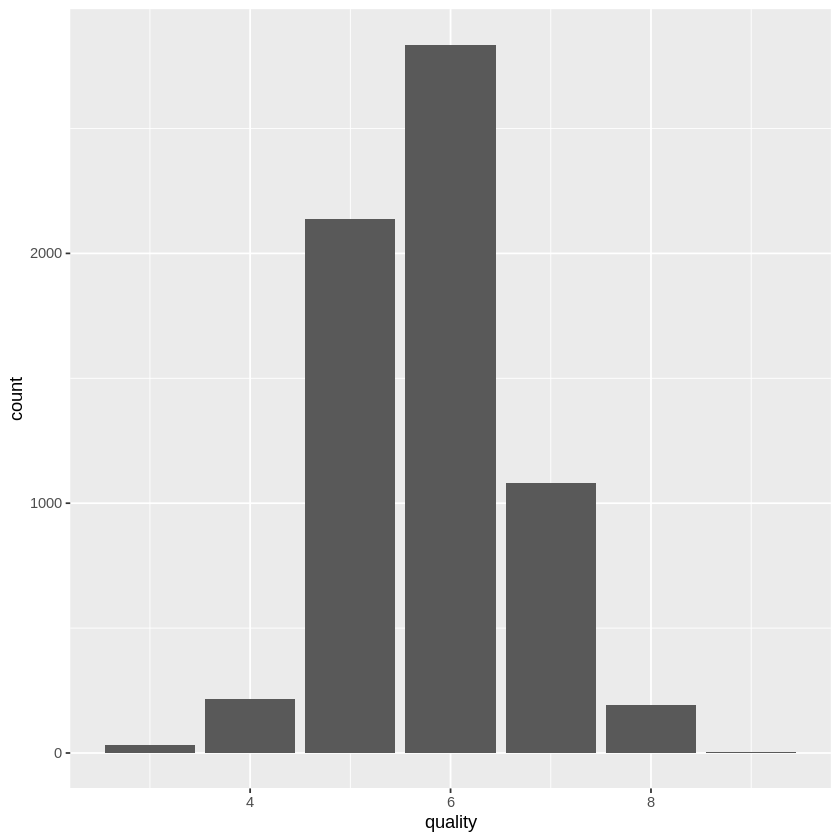

In [7]:
# make dummy variable (0 = red, 1 = white)

# get distribution of target variable
ggplot(data=data, aes(x=quality))+
  geom_bar()

data %>% group_by(quality)%>%summarise(count = n())

# group the quality of data into 2 groups high and low
wine_data<- data %>%
    mutate(type = ifelse(type == "red", 1,0),
          quality = case_when(quality >= 6 ~ "high",
                              TRUE ~ "low"),
          quality = factor(quality, levels = c("low", "high")))
  
head(wine_data)
levels(wine_data$quality)

### Exploratory Data Analysis

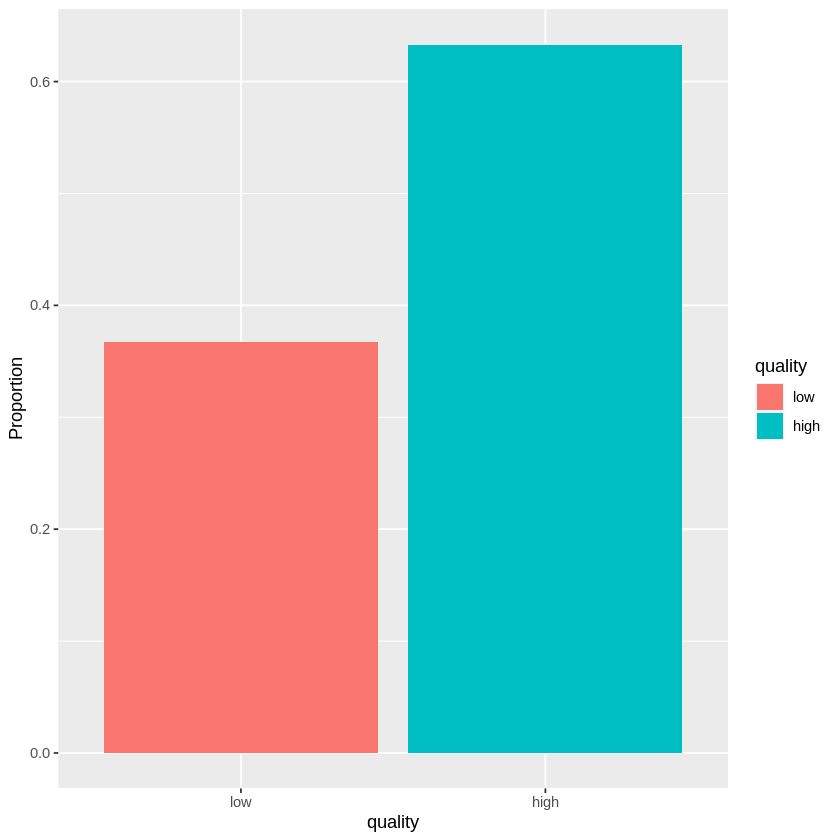

In [8]:
#distribution of target variable
wine_data %>% ggplot(aes(x=quality, fill=quality))+
  geom_bar(aes(y = after_stat(count)/sum(after_stat(count))))+
    ylab("Proportion")

# dataset is imbalanced in favour of the high category
# this will impact the choice of models and performance metrics

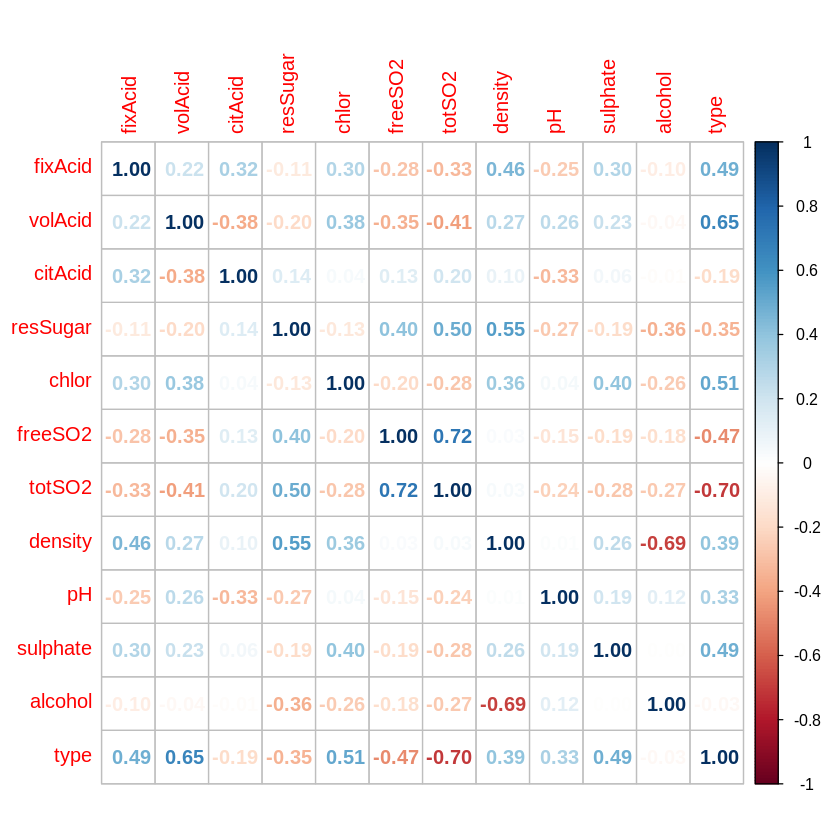

In [9]:
#Check correlation among data attributies
n <- cor(wine_data %>% select(-quality),use = "complete.obs")
corrplot(n, method = "number")

In [10]:
#remove freeSO2 since correlated with totSO2
wine_data <- wine_data %>% 
  select(-freeSO2)

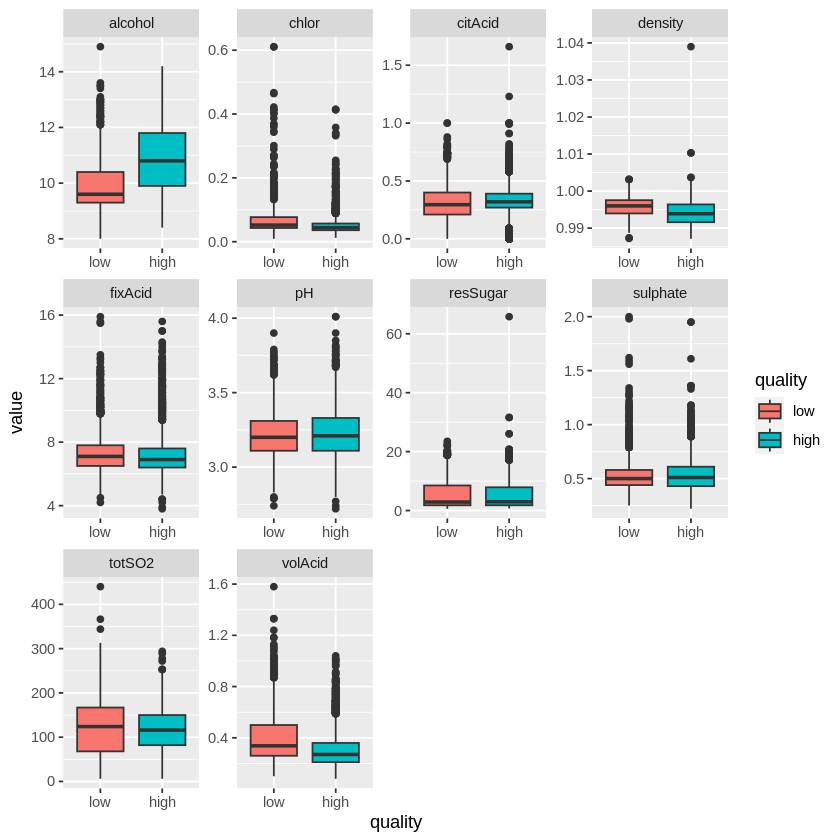

In [11]:
df_long <- wine_data %>% 
  pivot_longer(cols = fixAcid:alcohol, names_to = 'variable', values_to = 'value')

g <- ggplot(data = df_long, aes(x = quality, y = value, fill= quality)) +
  geom_boxplot() +
  facet_wrap(facets = ~variable, scales = 'free')
print(g)

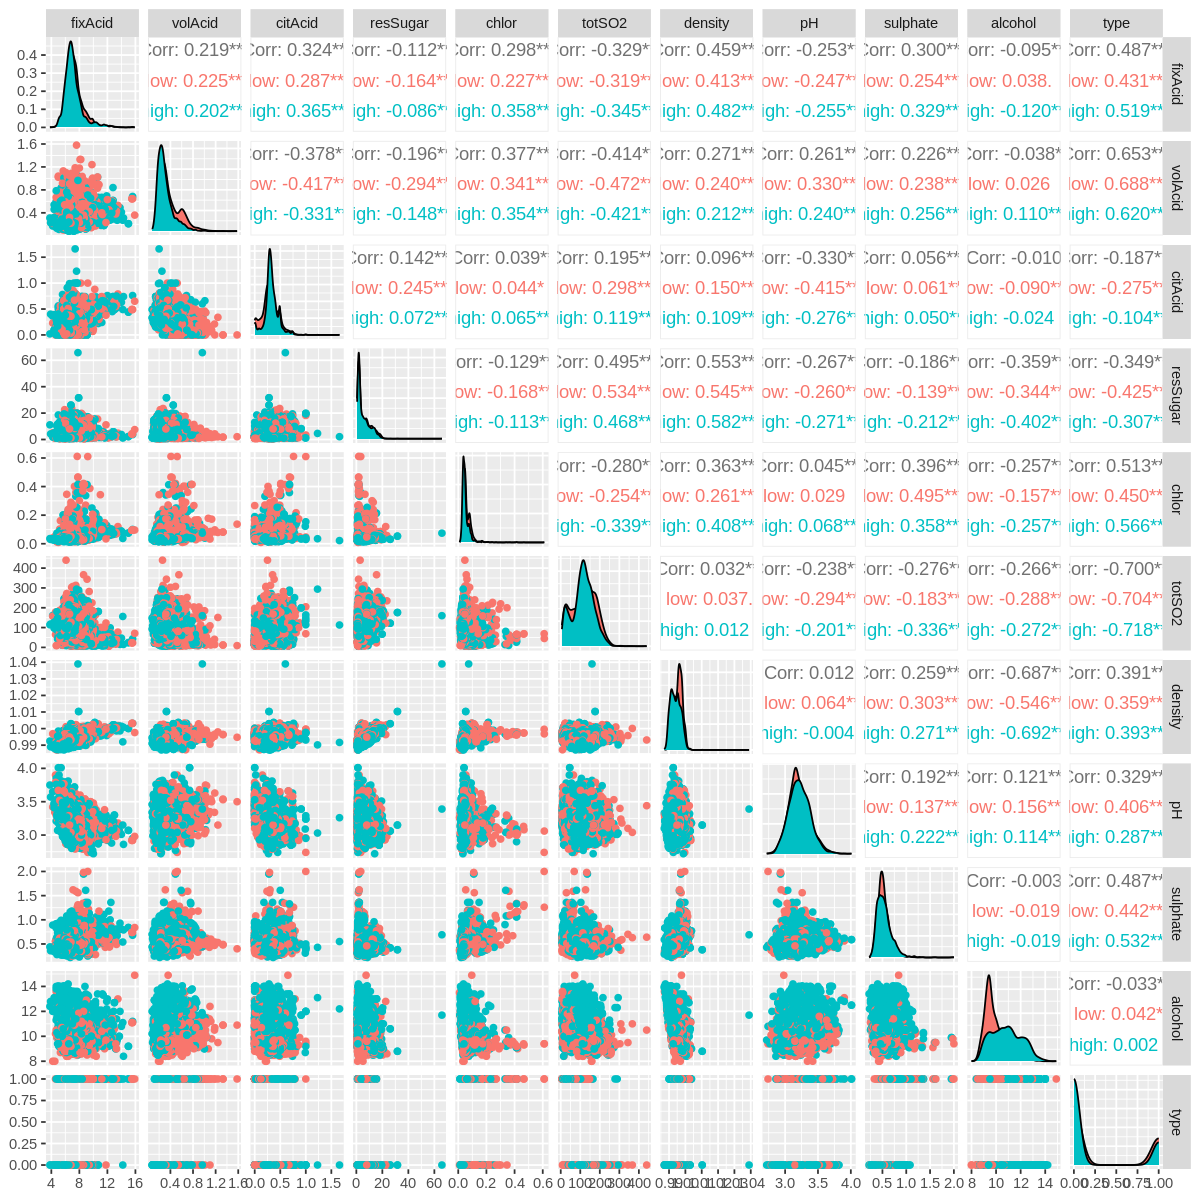

In [12]:
options(repr.plot.width=10, repr.plot.height=10)
ggpairs(data = wine_data, 
        columns = 2:ncol(wine_data), 
        mapping = aes(color = quality))

In [13]:
# scale the data
wine_data_scaled <-  wine_data %>%
  mutate(across(where(is.numeric), scale))

In [14]:
# PCA
wine_pca <- model.matrix(quality ~ ., data = wine_data_scaled)[,-1]
pca_total <- princomp(wine_pca)
# pca_total$loadings
# To get the loadings (see how much each comp is made up of variables) 
# and the scores (converts each component into value)unclass(pca_total$loadings)
scores <- pca_total$scores 
summary(pca_total)
#Can probably use first 8 principal components which explain >95% of variation
# OR could use first 7 prinicipal components which explain >90% of variation

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     1.8565995 1.5659555 1.2372084 0.94482866 0.84450929
Proportion of Variance 0.3134084 0.2229631 0.1391746 0.08116715 0.06484598
Cumulative Proportion  0.3134084 0.5363715 0.6755461 0.75671321 0.82155919
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.75700028 0.71305368 0.65532909 0.53592453 0.37383323
Proportion of Variance 0.05210342 0.04622944 0.03904748 0.02611448 0.01270662
Cumulative Proportion  0.87366261 0.91989205 0.95893953 0.98505402 0.99776063
                           Comp.11
Standard deviation     0.156937069
Proportion of Variance 0.002239367
Cumulative Proportion  1.000000000

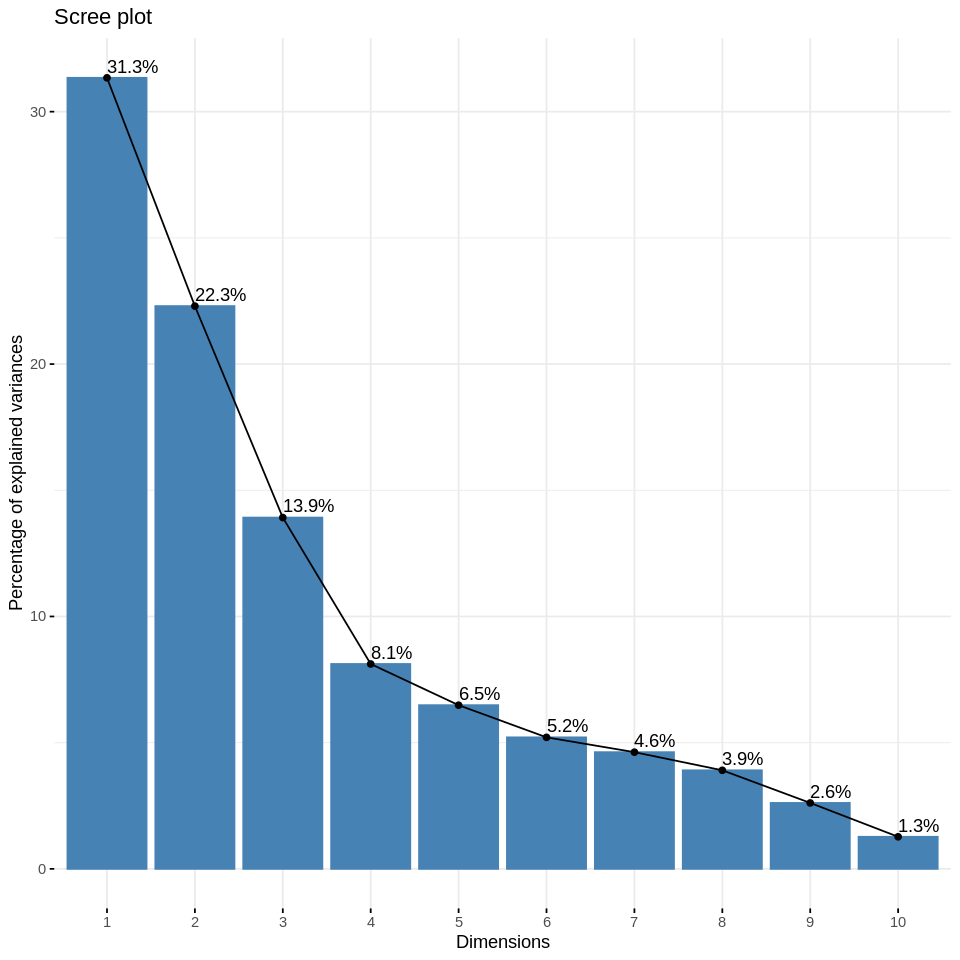

In [15]:
options(repr.plot.width=8, repr.plot.height=8)
fviz_screeplot(pca_total, addlabels = TRUE)

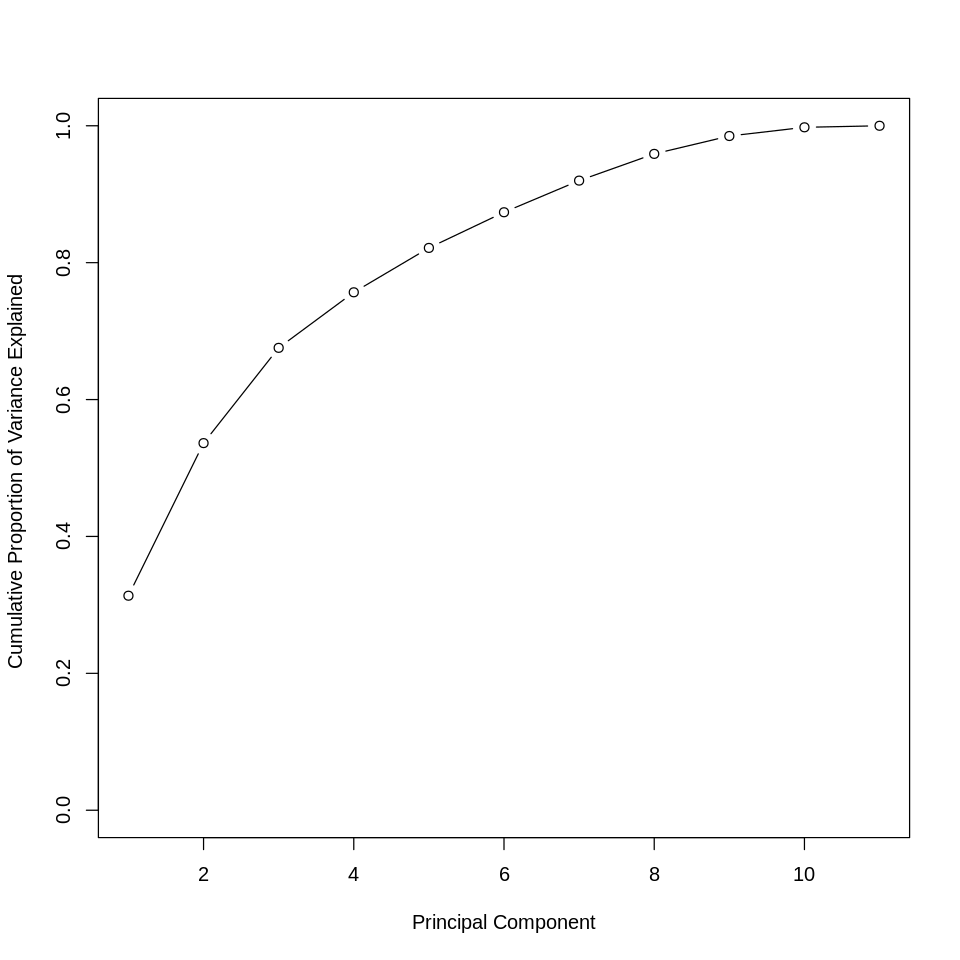

In [16]:
plot(cumsum(pca_total$sdev^2/sum(pca_total$sdev^2)), xlab="Principal Component",
     ylab="Cumulative Proportion of Variance Explained ", ylim=c(0,1) ,type='b') # SOLUTION

In [17]:
pca_df<- data.frame(scores[,1:7])
pca_df$quality<- wine_data_scaled$quality
head(pca_df)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,3.579228,-0.6846039,-2.560527,0.7027013,0.2237058,0.5443355,0.3609636,low
2,3.868953,-0.1346086,-1.742847,1.3806990,-0.7910041,-1.3282559,0.2708500,low
3,3.618911,-0.2204150,-1.542923,1.0750850,-0.4869032,-0.7098188,0.3512363,low
4,2.478325,1.6614434,2.591938,0.4326000,0.7479197,1.4273349,0.4382138,high
5,3.579228,-0.6846039,-2.560527,0.7027013,0.2237058,0.5443355,0.3609636,low
6,3.438679,-0.6622402,-2.508505,0.6013376,0.2234648,0.6025866,0.4588425,low


## Model Building

### Split Data into Train and Test

In [18]:
set.seed(0)

#use 80% of dataset as training set and 30% as test set
sample <- sample(c(TRUE, FALSE), nrow(wine_data_scaled), replace=TRUE, prob=c(0.8,0.2))
train  <- wine_data_scaled[sample, ]
test   <- wine_data_scaled[!sample, ]

dim(train)
dim(test)

# for splitting with PCA
# sample <- sample(c(TRUE, FALSE), nrow(pca_df), replace=TRUE, prob=c(0.8,0.2))
# train  <- pca_df[sample, ]
# test   <- pca_df[!sample, ]

# dim(train)
# dim(test)

[1] 5142   12

[1] 1355   12

In [19]:
tr<- trainControl(method = "repeatedcv", number = 10, repeats = 3)
fitControl <- trainControl(method="none", classProbs=TRUE)

## Model 1: Logistic Regression

In [20]:
#Use cv to train glm model
set.seed(0)
glmModel <- train(factor(quality)~., data=train, method="glm",
                  family="binomial", trControl=tr)
glmModel

Generalized Linear Model 

5142 samples
  11 predictor
   2 classes: 'low', 'high' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 4628, 4627, 4628, 4628, 4628, 4628, ... 
Resampling results:

  Accuracy   Kappa    
  0.7422528  0.4272042


In [21]:
# Final Logistic Regression trained on all train data
set.seed(0)
final_glm <- train(quality ~., data=train,
                   method="glm", family="binomial",
                  trControl = fitControl)

# class predictions with test data

pred_class_glm <- predict(final_glm, newdata = test)
cm_glm <- confusionMatrix(pred_class_glm, test$quality)
#cm_glm

acc_glm <- cm_glm$overall['Accuracy']
acc_glm
spec_glm <-cm_glm$byClass['Specificity']
spec_glm
sen_glm <-cm_glm$byClass['Sensitivity']
sen_glm
prec_glm <- cm_glm$byClass['Precision']
prec_glm

Accuracy 
0.7446494

Specificity 
  0.8461538

Sensitivity 
  0.5619835

Precision 
0.6699507

## Model 2: K - Nearest Neighbours

In [22]:
set.seed(0)
# Try values of k from 5 to 31
tunegrid_knn <- data.frame(k = seq(5,31,by=2))
knnModel <- train(quality ~., data = train, method = "knn",
                 trControl= tr,
                 tuneGrid = tunegrid_knn)
knnModel

k-Nearest Neighbors 

5142 samples
  11 predictor
   2 classes: 'low', 'high' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 4628, 4627, 4628, 4628, 4628, 4628, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.7491234  0.4520127
   7  0.7473088  0.4465285
   9  0.7495117  0.4500083
  11  0.7482162  0.4467109
  13  0.7479578  0.4455099
  15  0.7475699  0.4450006
  17  0.7468533  0.4424193
  19  0.7469179  0.4415802
  21  0.7472438  0.4412870
  23  0.7485404  0.4440957
  25  0.7469205  0.4395329
  27  0.7447146  0.4342588
  29  0.7440667  0.4321628
  31  0.7462723  0.4369998

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

In [23]:
# Final knn model trained on all train data
tgknn <- data.frame(k=9)
set.seed(0)
final_knn <- train(quality~., data=train,
                   method = "knn",
                  trControl = fitControl,
                  tuneGrid = tgknn)

In [24]:
# class predictions with test data
pred_class_knn <-predict(final_knn, newdata = test)
cm_knn <- confusionMatrix(pred_class_knn, test$quality)

acc_knn<-cm_knn$overall['Accuracy']
acc_knn
spec_knn<-cm_knn$byClass['Specificity']
spec_knn
sen_knn<-cm_knn$byClass['Sensitivity']
sen_knn
prec_knn <- cm_knn$byClass['Precision']
prec_knn

Accuracy 
0.7616236

Specificity 
  0.8450057

Sensitivity 
  0.6115702

Precision 
0.6867749

## Model 3: Random Forest

In [25]:
tunegrid_rf <- expand.grid(mtry = seq(1,11,by=1))
set.seed(0)

rfModel<- train(quality~. ,
                 data = train,
                 method = "rf", 
                 trControl = tr,
                 tuneGrid = tunegrid_rf)
rfModel

Random Forest 

5142 samples
  11 predictor
   2 classes: 'low', 'high' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 4628, 4627, 4628, 4628, 4628, 4628, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   1    0.8040297  0.5581576
   2    0.8232182  0.6131990
   3    0.8232822  0.6141591
   4    0.8225045  0.6125807
   5    0.8217913  0.6113995
   6    0.8206255  0.6091301
   7    0.8204941  0.6094772
   8    0.8193281  0.6069974
   9    0.8187464  0.6058447
  10    0.8187444  0.6061473
  11    0.8173828  0.6029822

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 3.

In [26]:
# Final rf model trained on all train data
tgrf <- data.frame(mtry=3)
set.seed(0)
final_rf <- train(quality ~ ., data = train,
                  method = "rf",
                  trControl = fitControl,
                  tuneGrid = tgrf)

In [27]:
# class predictions with test data
set.seed(0)
pred_class_rf<-predict(final_rf, newdata = test)
cm_rf<- confusionMatrix(pred_class_rf,factor(test$quality))
#cm_rf

acc_rf<-cm_rf$overall['Accuracy']
acc_rf
spec_rf<-cm_rf$byClass['Specificity']
spec_rf
sen_rf<-cm_rf$byClass['Sensitivity']
sen_rf
prec_rf <- cm_rf$byClass['Precision']
prec_rf

Accuracy 
0.8236162

Specificity 
  0.8966705

Sensitivity 
  0.6921488

Precision 
0.7882353

## Model 4: SVM

In [28]:
# SVM with linear kernel
set.seed(0)
svm_mod <- svm(quality~., data = train, kernel="linear", scale=FALSE, cost = 5)
svm_mod


Call:
svm(formula = quality ~ ., data = train, kernel = "linear", cost = 5, 
    scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  5 

Number of Support Vectors:  3043


In [29]:
# Tune svm with different parameters
set.seed(0)
svm_mod_tune <- tune(svm, quality~., data=train, 
                     ranges=list(
                         kernel=c("linear","radial"),
                         cost = c(0.1,1,10),
                         gamma = c(0.5, 1, 2),
                         sigma = c(0.1,1)))
svm_mod_tune


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 kernel cost gamma sigma
 radial    1     1   0.1

- best performance: 0.2170451 


In [30]:
#Final SVM model trained on all train data
tgsvm <- data.frame(C=1, sigma = 0.1)

set.seed(0)
final_svm <- train(quality~., data = train, method="svmRadial",
                       trControl = fitControl,
                       tuneGrid = tgsvm)
final_svm 

Support Vector Machines with Radial Basis Function Kernel 

5142 samples
  11 predictor
   2 classes: 'low', 'high' 

No pre-processing
Resampling: None 

In [31]:
# class predictions with test data
set.seed(0)
pred_class_svm <- predict(final_svm, newdata= test)

cm_svm<- confusionMatrix(pred_class_svm,factor(test$quality))
# cm_svm

acc_svm<- cm_svm$overall['Accuracy']
acc_svm
spec_svm<- cm_svm$byClass['Specificity']
spec_svm
sen_svm<- cm_svm$byClass['Sensitivity']
sen_svm
prec_svm <- cm_svm$byClass['Precision']
prec_svm

Accuracy 
0.7682657

Specificity 
  0.8633754

Sensitivity 
  0.5971074

Precision 
0.7083333

## ROC Curve

In [32]:
#Get prediccted probabilites for each model using test data
predProb_glm <- predict(final_glm, newdata=test, type="prob")$high
predProb_knn <- predict(final_knn, newdata=test, type="prob")$high
predProb_rf <- predict(final_rf, newdata=test, type="prob")$high
predProb_svm <- predict(final_svm, newdata=test, type="prob")$high

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases



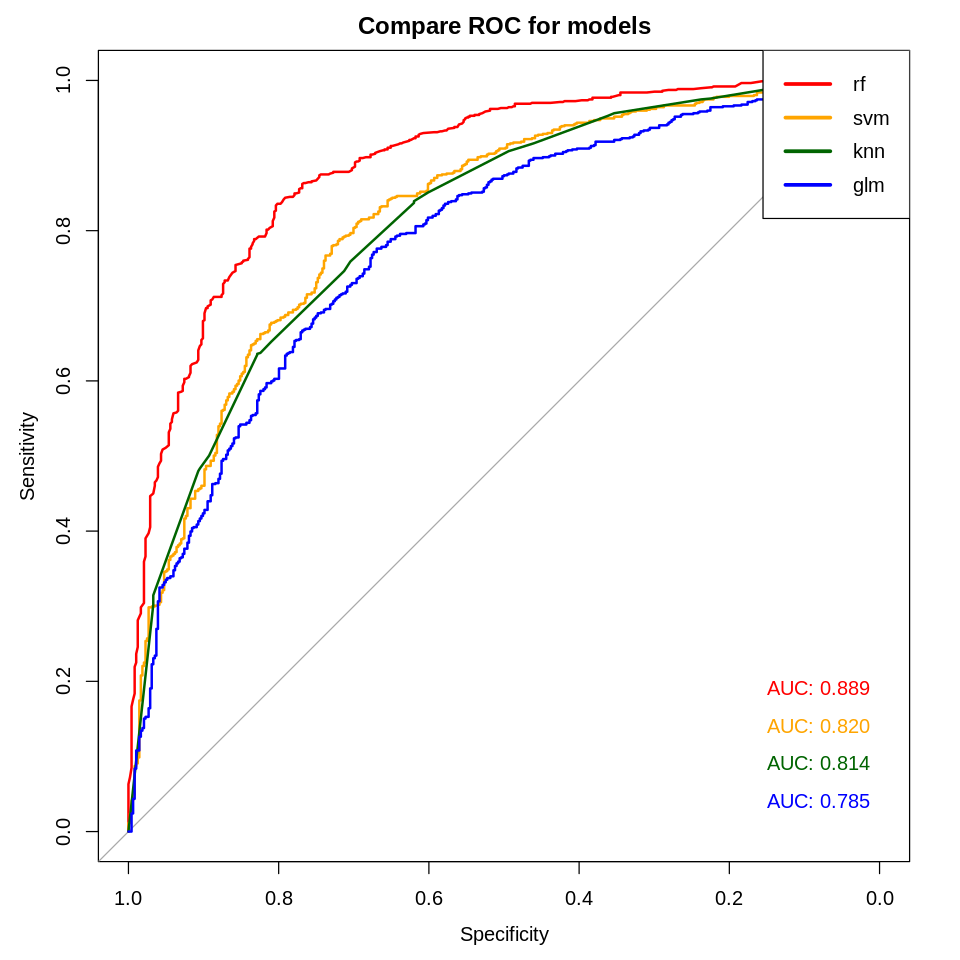

In [33]:
#Create ROC curves for each of the final models
roc_glm <- roc(test$quality=="high",predProb_glm)
roc_knn <- roc(test$quality=="high",predProb_knn)
roc_rf <- roc(test$quality=="high",predProb_rf)
roc_svm <- roc(test$quality=="high",predProb_svm)

plot(roc_rf, col="red", print.auc=TRUE, print.auc.x =0.15, print.auc.y=0.20,main="Compare ROC for models")
plot(roc_svm, add=TRUE, col="orange", print.auc=TRUE, print.auc.x =0.15, print.auc.y=0.15)
plot(roc_knn, add=TRUE, col="dark green", print.auc=TRUE, print.auc.x =0.15, print.auc.y=0.10)
plot(roc_glm, add=TRUE,col="blue", print.auc=TRUE, print.auc.x =0.15, print.auc.y=0.05, )
legend("topright",legend = c("rf", "svm","knn","glm"),lty = c(1,1), col = c("red", "orange","dark green","blue"), lwd = 3)

## Calculating Metric

In [34]:
dummyVars<-contrasts(train$quality)
dummyVars

,high
low,0
high,1


In [35]:
#Function to calculate metrics
cf_metrics <- function(preds){
    tp <- sum(preds==test$quality & preds=="high")
    tn <- sum(preds==test$quality & preds=="low")
    fp <- sum(preds!=test$quality & preds=="high")
    fn <- sum(preds!=test$quality & preds=="low")
    FPR <- fp/(fp+tn)
    FNR <- fn/(tp+fn)
    list<- list("FPR" = FPR, "FNR" = FNR)
    return (list)
    }

# glm
glm_values<-cf_metrics(pred_class_glm)
glm_FPR<-glm_values$FPR
glm_FNR<-glm_values$FNR

# knn
knn_values<-cf_metrics(pred_class_knn)
knn_FPR<-knn_values$FPR
knn_FNR<-knn_values$FNR

# rf
rf_values<-cf_metrics(pred_class_rf)
rf_FPR<-rf_values$FPR
rf_FNR<-rf_values$FNR

#svm
svm_values<-cf_metrics(pred_class_svm)
svm_FPR<-svm_values$FPR
svm_FNR<-svm_values$FNR

## Table for the Metrics

In [36]:
model_names <- c("Logistic Regression", "K Nearest Neighbours", "Random Forest", "Support Vector Machine")
acc_values <- c(acc_glm, acc_knn, acc_rf, acc_svm)
spec_values <- c(spec_glm, spec_knn, spec_rf, spec_svm)
sen_values <- c(sen_glm, sen_knn, sen_rf, sen_svm)
prec_values <- c(prec_glm, prec_knn, prec_rf, prec_svm)
FPR_values <- c(glm_FPR, knn_FPR, rf_FPR, svm_FPR)
FNR_values <- c(glm_FNR, knn_FNR, rf_FNR, svm_FNR)

comp_table <- data.frame(model_names, acc_values, spec_values, sen_values, prec_values, FPR_values, FNR_values)
names(comp_table) <- c('Model', 'Accuracy', 'Specificity', 'Sensitivity', 'Precision', 'FPR', 'FNR')

comp_table[,-1] <-round(comp_table[,-1],2) 
comp_table

Model,Accuracy,Specificity,Sensitivity,Precision,FPR,FNR
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Logistic Regression,0.74,0.85,0.56,0.67,0.44,0.15
K Nearest Neighbours,0.76,0.85,0.61,0.69,0.39,0.15
Random Forest,0.82,0.90,0.69,0.79,0.31,0.10
Support Vector Machine,0.77,0.86,0.60,0.71,0.40,0.14


## Looking at best model

rf variable importance

         Overall
alcohol   396.99
volAcid   306.63
density   271.41
chlor     223.73
totSO2    222.92
citAcid   205.39
resSugar  199.13
sulphate  195.66
pH        188.73
fixAcid   171.20
type       11.12

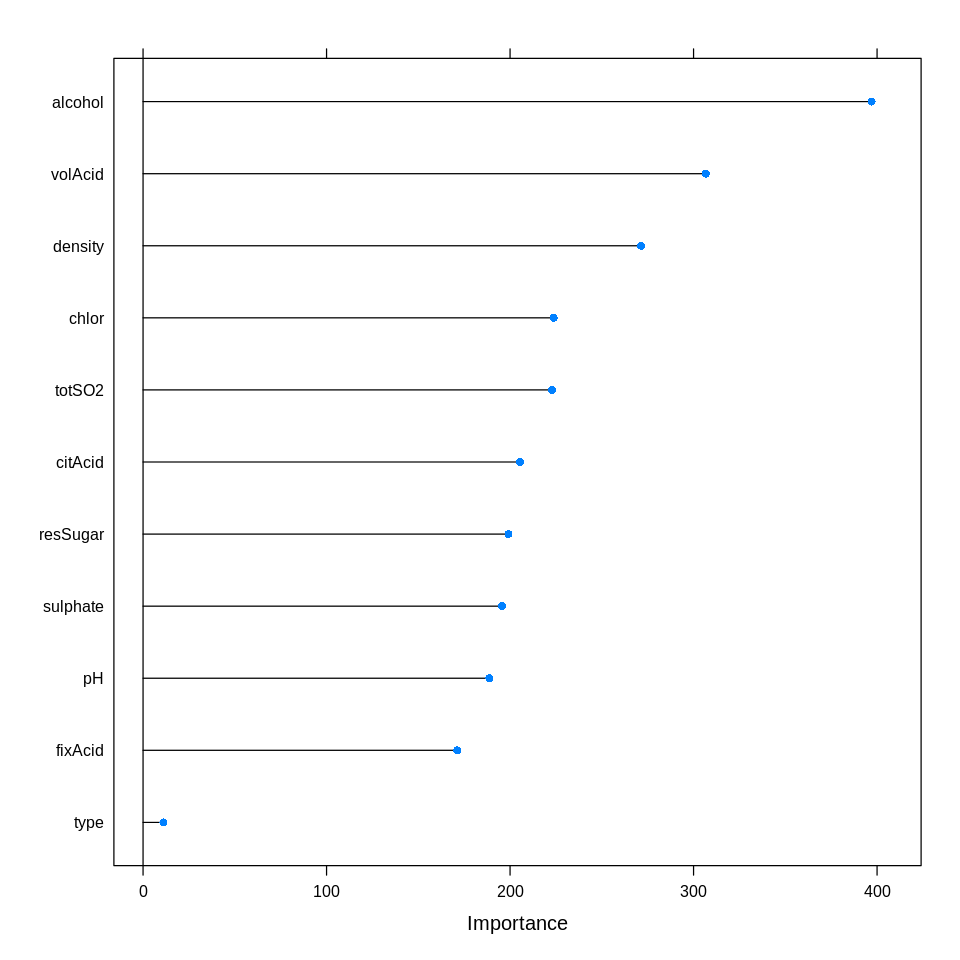

In [37]:
# Exploring the best model in more detail
rf_imp <- varImp(final_rf, scale=FALSE)
rf_imp
plot(rf_imp)